# Lab 2 - Swiss dataset


1. Relationships

2. Load in the data “swiss.csv” from moodle and look at the readme file for information on dataset.

In [1]:
import pandas as pd

swiss = pd.read_csv('swiss.csv')

swiss.head()

,Name,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


3. Investigate if any the numerical variables seem to have a linear relationship by producing scatterplots.

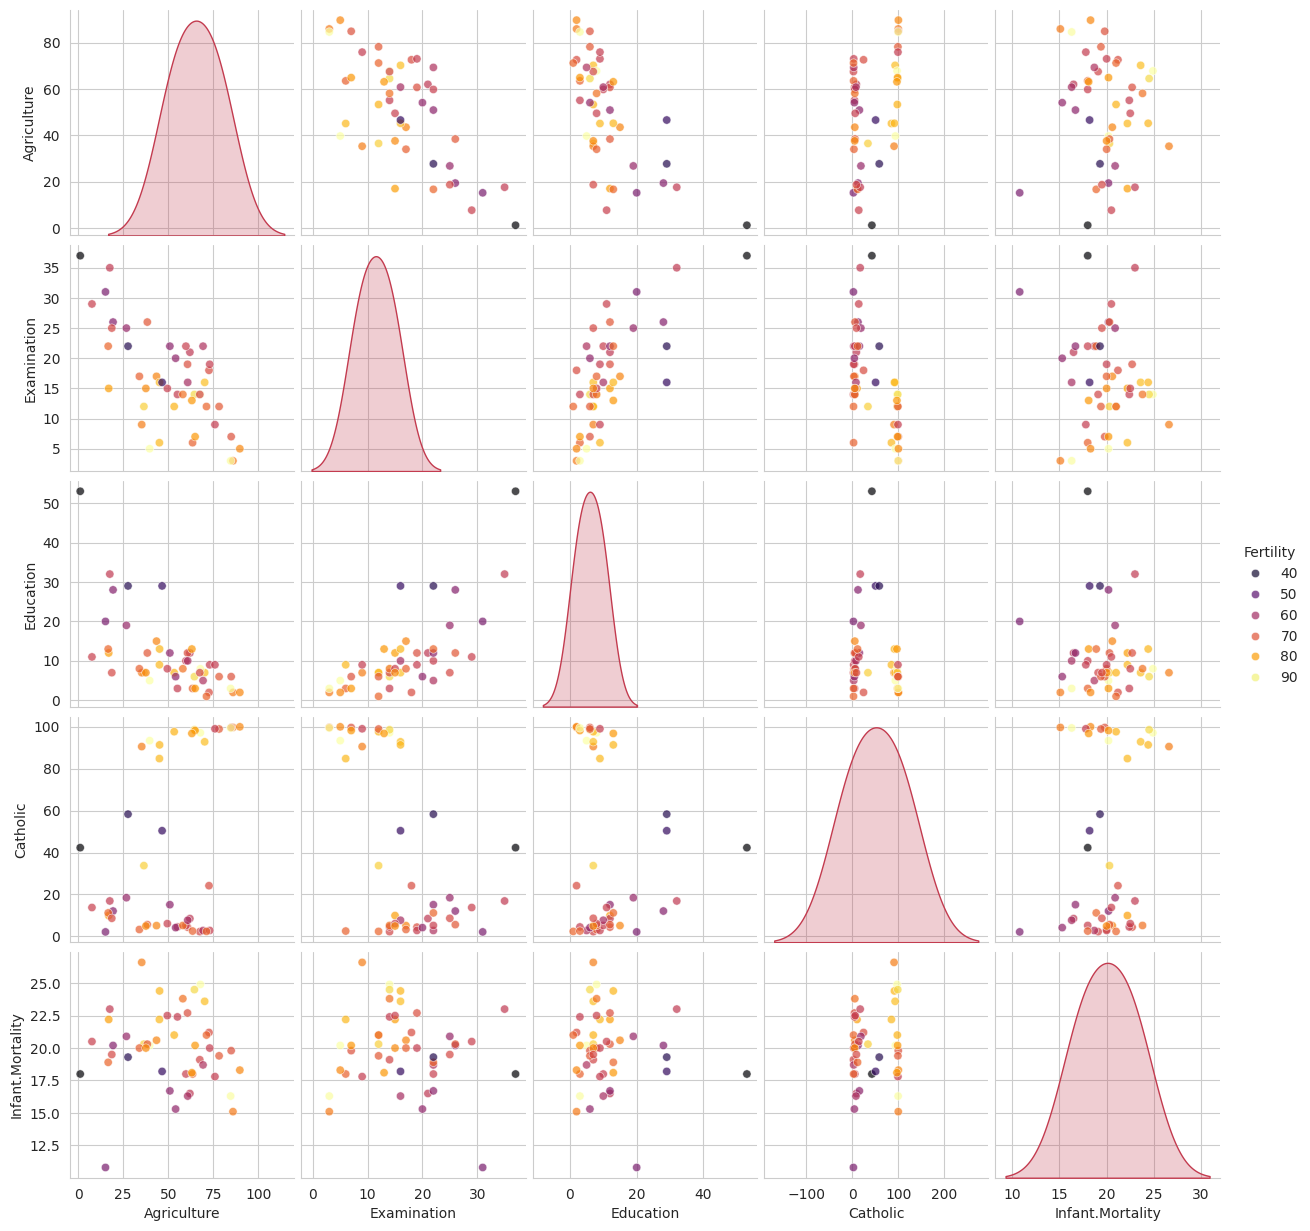

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style first
sns.set_style("whitegrid")

# Create pairplot with custom colors
pairplot = sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], 
                        hue='Fertility', 
                        palette='inferno',
                        plot_kws={'alpha': 0.7})  # Add transparency

plt.show()

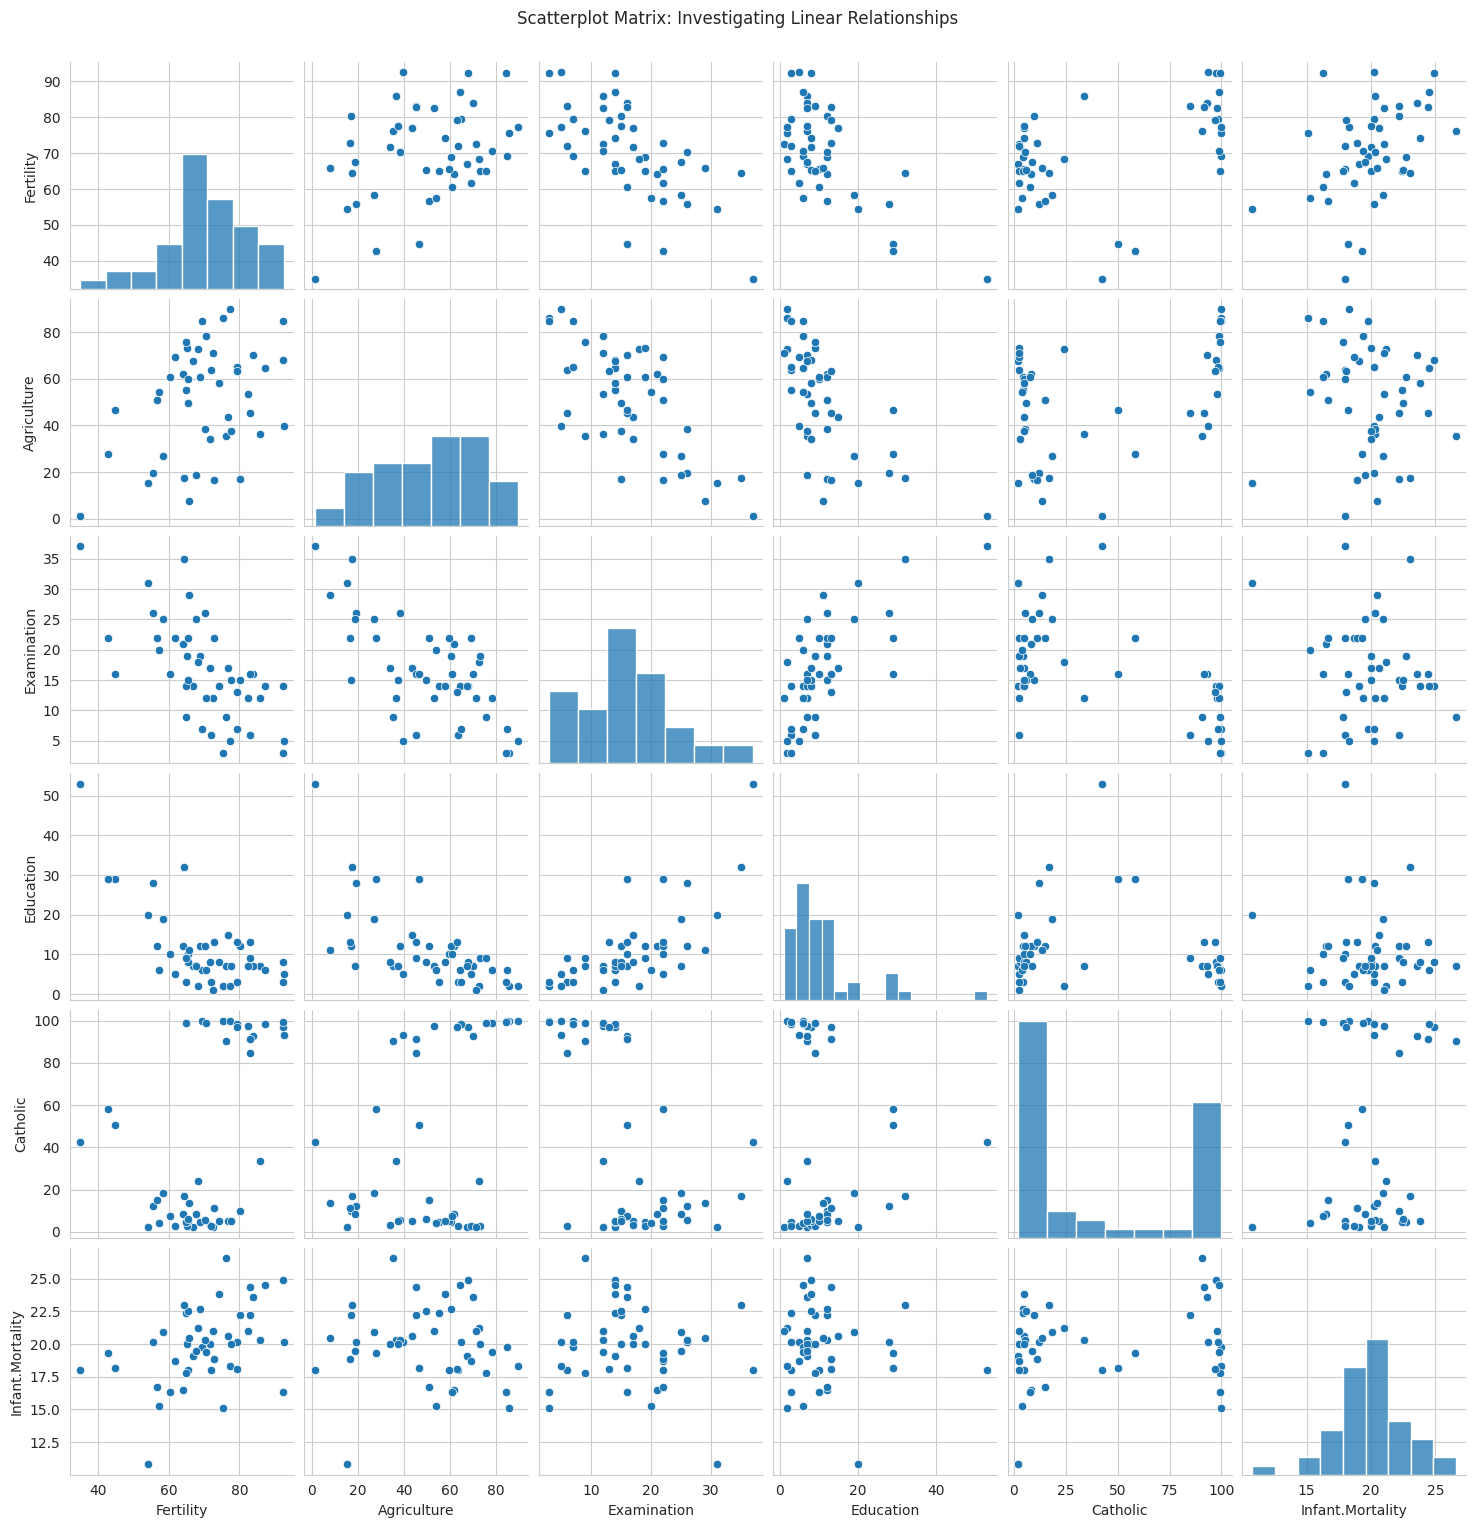

In [3]:
    # Create pairplot to see all relationships
    sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']])
    plt.suptitle("Scatterplot Matrix: Investigating Linear Relationships", y=1.02)
    plt.show()

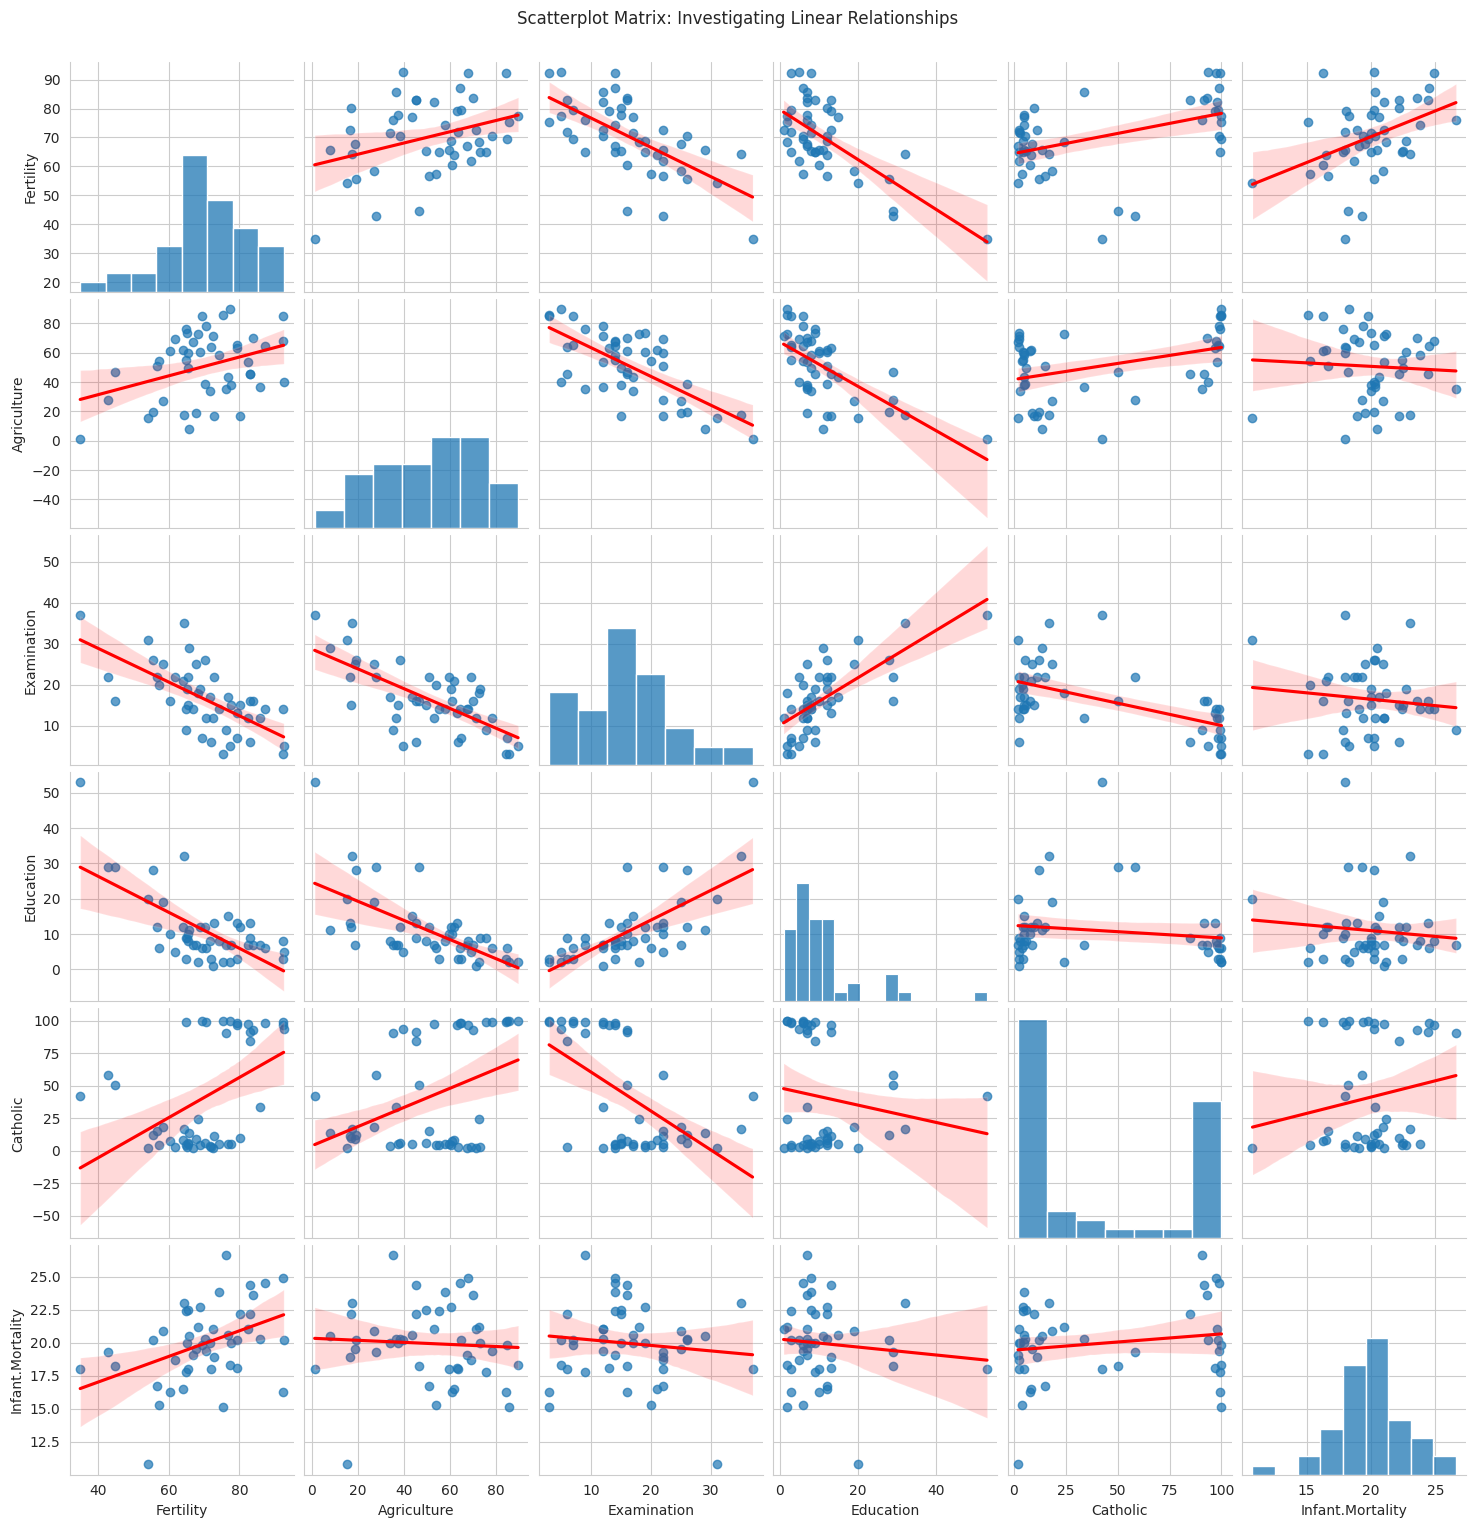

In [4]:
# Create pairplot to see all relationships with regression lines
sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], 
             kind='reg',  # This adds regression lines
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}})
plt.suptitle("Scatterplot Matrix: Investigating Linear Relationships", y=1.02)
plt.show()

In [5]:
#pip install statsmodels

4. With those that do show signs of a linear relationship, calculate their Pearson correlations and interpret the results.


In [6]:
# Calculate Pearson correlation matrix
corr_matrix = swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']].corr(method='pearson')

print("PEARSON CORRELATION MATRIX:")
print(corr_matrix.round(3))

PEARSON CORRELATION MATRIX:
                  Fertility  Agriculture  Examination  Education  Catholic  \
Fertility             1.000        0.353       -0.646     -0.664     0.464   
Agriculture           0.353        1.000       -0.687     -0.640     0.401   
Examination          -0.646       -0.687        1.000      0.698    -0.573   
Education            -0.664       -0.640        0.698      1.000    -0.154   
Catholic              0.464        0.401       -0.573     -0.154     1.000   
Infant.Mortality      0.417       -0.061       -0.114     -0.099     0.175   

                  Infant.Mortality  
Fertility                    0.417  
Agriculture                 -0.061  
Examination                 -0.114  
Education                   -0.099  
Catholic                     0.175  
Infant.Mortality             1.000  


5. With those that do show signs of non-linear relationship, calculate appropriate correlations and interpret the results.

In [7]:
# SIMPLE CODE: Check non-linear relationships
from scipy.stats import spearmanr

# Check Catholic vs Education
# Pearson correlation measures LINEAR relationships (straight lines)
pearson1 = swiss['Catholic'].corr(swiss['Education'])
# Spearman correlation measures NON-LINEAR relationships (any monotonic pattern)
spearman1, _ = spearmanr(swiss['Catholic'], swiss['Education'])

# Print explanation of what each correlation type measures
print("Linear = Pearson, Non-linear = Spearman")

print("Catholic vs Education:")
print(f"Linear: {pearson1:.3f}")  # How well it fits a straight line
print(f"Non-linear: {spearman1:.3f}")  # How well it follows any consistent pattern
# If the two values are very different, the relationship is non-linear
if abs(spearman1 - pearson1) > 0.15:
    print("→ NON-LINEAR")  # Big difference means curved relationship
print()

# Check Catholic vs Infant.Mortality  
# Same process for this variable pair
pearson2 = swiss['Catholic'].corr(swiss['Infant.Mortality'])
spearman2, _ = spearmanr(swiss['Catholic'], swiss['Infant.Mortality'])

print("Catholic vs Infant.Mortality:")
print(f"Linear: {pearson2:.3f}")
print(f"Non-linear: {spearman2:.3f}")
if abs(spearman2 - pearson2) > 0.15:
    print("→ NON-LINEAR")  # Flag if significantly non-linear
print()

# Check Agriculture vs Infant.Mortality
# Same process for this variable pair
pearson3 = swiss['Agriculture'].corr(swiss['Infant.Mortality'])
spearman3, _ = spearmanr(swiss['Agriculture'], swiss['Infant.Mortality'])

print("Agriculture vs Infant.Mortality:")
print(f"Linear: {pearson3:.3f}") 
print(f"Non-linear: {spearman3:.3f}")
if abs(spearman3 - pearson3) > 0.15:
    print("→ NON-LINEAR")  # Flag if significantly non-linear

Linear = Pearson, Non-linear = Spearman
Catholic vs Education:
Linear: -0.154
Non-linear: -0.144

Catholic vs Infant.Mortality:
Linear: 0.175
Non-linear: 0.066

Agriculture vs Infant.Mortality:
Linear: -0.061
Non-linear: -0.152


## **Summary: All relationships are LINEAR**

### **1. Catholic vs Education:**
- Linear: -0.154
- Non-linear: -0.144
- **Difference: 0.010** → Very small difference
- **Interpretation**: This is a LINEAR relationship (weak negative)

### **2. Catholic vs Infant.Mortality:**
- Linear: 0.175  
- Non-linear: 0.066
- **Difference: 0.109** → Moderate difference, but still < 0.15
- **Interpretation**: This is a LINEAR relationship (very weak positive)

### **3. Agriculture vs Infant.Mortality:**
- Linear: -0.061
- Non-linear: -0.152
- **Difference: 0.091** → Moderate difference, but still < 0.15
- **Interpretation**: This is a LINEAR relationship (very weak negative)

## **Key Conclusion:**
**None of these relationships show strong signs of being non-linear.** All the differences between Pearson and Spearman are less than 0.15, which means the relationships are essentially linear (even if they're weak).

## **What this means for your analysis:**
- You can use Pearson correlation for all these relationships
- No need to worry about complex curved patterns
- The weak correlations suggest these variable pairs don't have strong relationships of any kind

**In your answer, you would write:** "None of the examined variable pairs show significant non-linear relationships, as all Pearson-Spearman differences are below the 0.15 threshold."

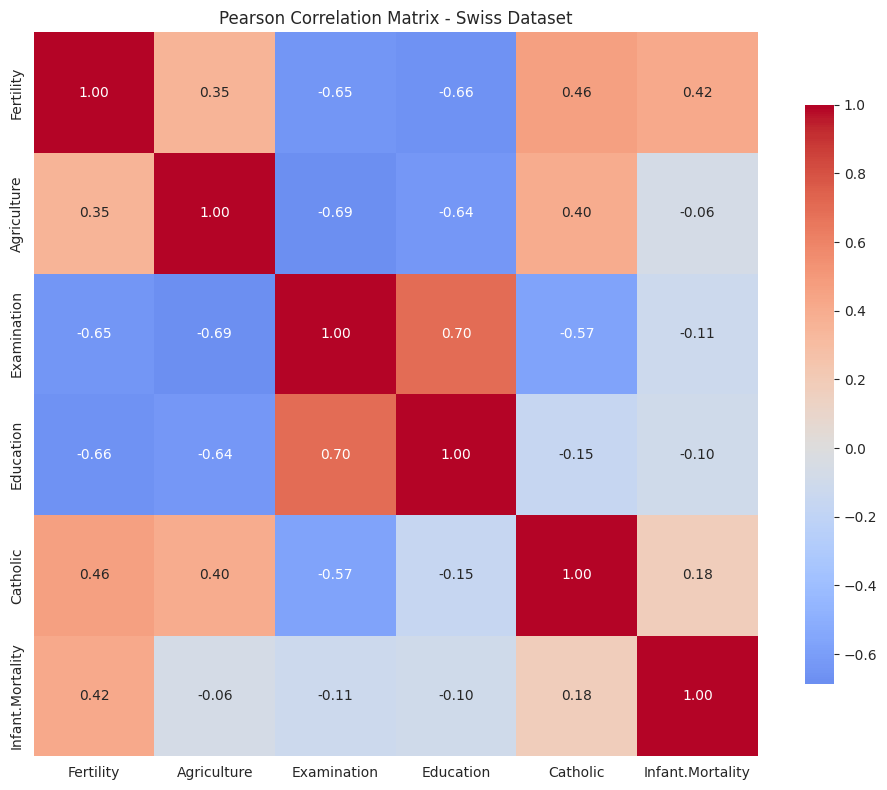

In [8]:

# Enhanced heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, square=True, cbar_kws={'shrink': 0.8})
plt.title('Pearson Correlation Matrix - Swiss Dataset')
plt.tight_layout()
plt.show()

## What a Correlation Matrix Compares

A correlation matrix **compares each variable against every other variable** in the dataset. It's like creating a "relationship map" between all pairs.

### In your code:
You have 6 variables: `['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']`

The correlation matrix creates a **6×6 grid** where:
- Rows and columns both represent the same 6 variables
- Each cell shows the correlation between the row variable and column variable

### Example of what's being compared:
```
Fertility vs Agriculture
Fertility vs Examination  
Fertility vs Education
Fertility vs Catholic
Fertility vs Infant.Mortality
Agriculture vs Examination
Agriculture vs Education
...and so on for ALL possible pairs
```

## How to Read the Matrix:

```python
# The diagonal will always be 1.0 because:
Fertility vs Fertility = 1.0 (perfect correlation)
Agriculture vs Agriculture = 1.0
# etc.

# The other cells show relationships like:
Fertility vs Education = -0.66 (strong negative correlation)
# This means: as Education increases, Fertility tends to decrease
```

## What the Numbers Mean:
- **+1.0**: Perfect positive correlation (both increase together)
- **0.0**: No relationship
- **-1.0**: Perfect negative correlation (one increases, other decreases)
- **±0.7 to ±1.0**: Strong relationship
- **±0.3 to ±0.7**: Moderate relationship  
- **±0.0 to ±0.3**: Weak relationship

## So you're NOT misunderstanding - you're exactly right!
The matrix compares **each variable with every other variable** to answer questions like:
- "When agriculture employment increases, what happens to fertility rates?"
- "Is there a relationship between education and infant mortality?"

The heatmap just makes these patterns visually obvious through color coding!

# 6. What is the response variable and the research question of interest?

we are interested on what impacts fertility

In [9]:
# 6. What is the response variable and the research question of interest?

# Research Question: What factors influence fertility rates in Swiss provinces?
# Response Variable: Fertility

print("RESEARCH QUESTION:")
print("What socio-economic and demographic factors influence fertility rates in Swiss provinces?")
print("\nRESPONSE VARIABLE: Fertility")
print("This represents the common standardized fertility measure across Swiss provinces")

# Based on our correlation analysis, we can see which variables are most related to fertility
fertility_correlations = corr_matrix['Fertility'].sort_values(ascending=False)
print("\nCORRELATIONS WITH FERTILITY:")
print(fertility_correlations)
print("\nStrongest predictors based on correlation:")
print("- Education (negative correlation: -0.66)")
print("- Examination (negative correlation: -0.65)") 
print("- Catholic (positive correlation: 0.46)")

RESEARCH QUESTION:
What socio-economic and demographic factors influence fertility rates in Swiss provinces?

RESPONSE VARIABLE: Fertility
This represents the common standardized fertility measure across Swiss provinces

CORRELATIONS WITH FERTILITY:
Fertility           1.000000
Catholic            0.463685
Infant.Mortality    0.416556
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Name: Fertility, dtype: float64

Strongest predictors based on correlation:
- Education (negative correlation: -0.66)
- Examination (negative correlation: -0.65)
- Catholic (positive correlation: 0.46)


7. Fit a simple linear regression for the variable you think most suitable for predicting the response variable. Comment on whether the assumptions are satisfied, interpretation of the results and the fit of the model.


SIMPLE LINEAR REGRESSION: Fertility ~ Education
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     35.45
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.66e-07
Time:                        23:05:02   Log-Likelihood:                -171.21
No. Observations:                  47   AIC:                             346.4
Df Residuals:                      45   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

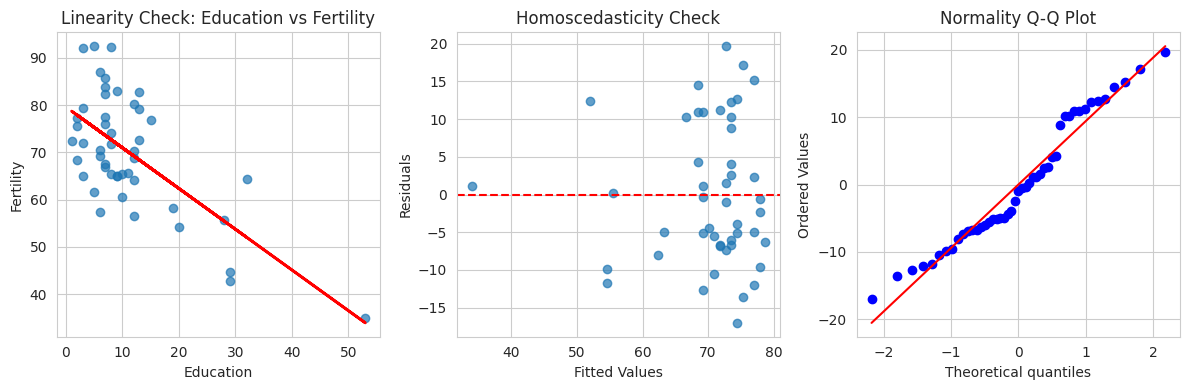


Normality test (Shapiro-Wilk): p-value = 0.059
→ Assumption satisfied if p > 0.05

INTERPRETATION:
- R-squared: 0.441 → Education explains 44.1% of fertility variation
- Coefficient: -0.862 → Each unit increase in Education decreases Fertility by 0.862
- p-value: 0.0000 → Relationship is statistically significant


In [10]:
# 7. Fit a simple linear regression for the variable you think most suitable for predicting the response variable. 
# Comment on whether the assumptions are satisfied, interpretation of the results and the fit of the model.

import statsmodels.api as sm
from scipy import stats
import numpy as np

# Based on correlation analysis, Education has the strongest relationship with Fertility
print("SIMPLE LINEAR REGRESSION: Fertility ~ Education")
print("=" * 50)

# Prepare data
X = swiss['Education']
y = swiss['Fertility']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit model
model_simple = sm.OLS(y, X_with_const).fit()

# Print results
print(model_simple.summary())
print("\n" + "="*50)

# Check assumptions
print("\nASSUMPTION CHECKING:")
print("-" * 30)

# 1. Linearity assumption
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(swiss['Education'], swiss['Fertility'], alpha=0.7)
plt.plot(swiss['Education'], model_simple.predict(X_with_const), color='red', linewidth=2)
plt.xlabel('Education')
plt.ylabel('Fertility')
plt.title('Linearity Check: Education vs Fertility')

# 2. Residuals vs Fitted (homoscedasticity)
residuals = model_simple.resid
fitted = model_simple.fittedvalues

plt.subplot(1, 3, 2)
plt.scatter(fitted, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')

# 3. Normality of residuals
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Q-Q Plot')

plt.tight_layout()
plt.show()

# Statistical tests for assumptions
print(f"\nNormality test (Shapiro-Wilk): p-value = {stats.shapiro(residuals)[1]:.3f}")
print("→ Assumption satisfied if p > 0.05")

# Interpretation
print("\nINTERPRETATION:")
print(f"- R-squared: {model_simple.rsquared:.3f} → Education explains {model_simple.rsquared*100:.1f}% of fertility variation")
print(f"- Coefficient: {model_simple.params['Education']:.3f} → Each unit increase in Education decreases Fertility by {abs(model_simple.params['Education']):.3f}")
print(f"- p-value: {model_simple.pvalues['Education']:.4f} → Relationship is statistically significant")

8. Multiple Linear Regression Model


In [11]:
# 8. Multiple Linear Regression Model

print("MULTIPLE LINEAR REGRESSION: All Variables")
print("=" * 50)

# Prepare data for multiple regression (excluding the 'Name' column)
X_multi = swiss[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y_multi = swiss['Fertility']

# Add constant
X_multi_const = sm.add_constant(X_multi)

# Fit multiple regression model
model_multi = sm.OLS(y_multi, X_multi_const).fit()

# Print results
print(model_multi.summary())

MULTIPLE LINEAR REGRESSION: All Variables
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           5.59e-10
Time:                        23:06:16   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

9. Fit the full multiple linear regression model including all numerical variables. Comment on whether the assumptions are satisfied, interpretation of the results and the fit of the model.


MULTIPLE REGRESSION: ASSUMPTION CHECKING AND INTERPRETATION

MULTICOLLINEARITY CHECK (Variance Inflation Factors):
           Variable         VIF
0             const  104.924833
1       Agriculture    2.284129
2       Examination    3.675420
3         Education    2.774943
4          Catholic    1.937160
5  Infant.Mortality    1.107542

VIF Interpretation:
VIF < 5: No multicollinearity
VIF 5-10: Moderate multicollinearity
VIF > 10: High multicollinearity


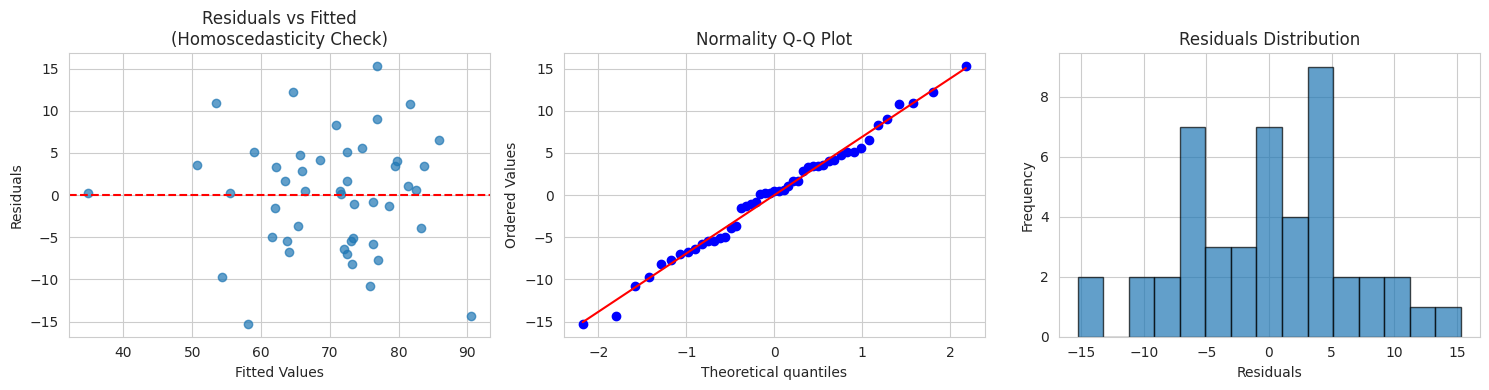


ASSUMPTION TESTS:
Normality (Shapiro-Wilk): p-value = 0.932

MODEL INTERPRETATION:
R-squared: 0.707 → Model explains 70.7% of fertility variation
Adjusted R-squared: 0.671

SIGNIFICANT PREDICTORS (p < 0.05):
- Agriculture: coefficient = -0.172 (p = 0.019) → decreases fertility
- Education: coefficient = -0.871 (p = 0.000) → decreases fertility
- Catholic: coefficient = 0.104 (p = 0.005) → increases fertility
- Infant.Mortality: coefficient = 1.077 (p = 0.007) → increases fertility

NON-SIGNIFICANT PREDICTORS (p ≥ 0.05):
- Examination: p = 0.315


In [12]:
# 9. Comment on whether the assumptions are satisfied, interpretation of the results and the fit of the model.

print("MULTIPLE REGRESSION: ASSUMPTION CHECKING AND INTERPRETATION")
print("=" * 60)

# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nMULTICOLLINEARITY CHECK (Variance Inflation Factors):")
vif_data = pd.DataFrame()
vif_data["Variable"] = X_multi_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi_const.values, i) for i in range(X_multi_const.shape[1])]
print(vif_data)

print("\nVIF Interpretation:")
print("VIF < 5: No multicollinearity")
print("VIF 5-10: Moderate multicollinearity") 
print("VIF > 10: High multicollinearity")

# Check residuals for multiple regression
residuals_multi = model_multi.resid
fitted_multi = model_multi.fittedvalues

plt.figure(figsize=(15, 4))

# Residuals vs Fitted
plt.subplot(1, 3, 1)
plt.scatter(fitted_multi, residuals_multi, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted\n(Homoscedasticity Check)')

# Q-Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals_multi, dist="norm", plot=plt)
plt.title('Normality Q-Q Plot')

# Residuals distribution
plt.subplot(1, 3, 3)
plt.hist(residuals_multi, bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()

# Statistical tests
print(f"\nASSUMPTION TESTS:")
print(f"Normality (Shapiro-Wilk): p-value = {stats.shapiro(residuals_multi)[1]:.3f}")

# Model interpretation
print("\nMODEL INTERPRETATION:")
print(f"R-squared: {model_multi.rsquared:.3f} → Model explains {model_multi.rsquared*100:.1f}% of fertility variation")
print(f"Adjusted R-squared: {model_multi.rsquared_adj:.3f}")

print("\nSIGNIFICANT PREDICTORS (p < 0.05):")
significant_vars = model_multi.pvalues[model_multi.pvalues < 0.05].index.tolist()
for var in significant_vars:
    if var != 'const':
        coef = model_multi.params[var]
        pval = model_multi.pvalues[var]
        direction = "increases" if coef > 0 else "decreases"
        print(f"- {var}: coefficient = {coef:.3f} (p = {pval:.3f}) → {direction} fertility")

print("\nNON-SIGNIFICANT PREDICTORS (p ≥ 0.05):")
non_sig_vars = [var for var in model_multi.pvalues.index if model_multi.pvalues[var] >= 0.05 and var != 'const']
for var in non_sig_vars:
    print(f"- {var}: p = {model_multi.pvalues[var]:.3f}")

10. Assess the added variables plots. Interpret these plots



ADDED VARIABLE PLOTS (Partial Regression Plots)
These show the relationship between each predictor and fertility,
after controlling for all other variables in the model.


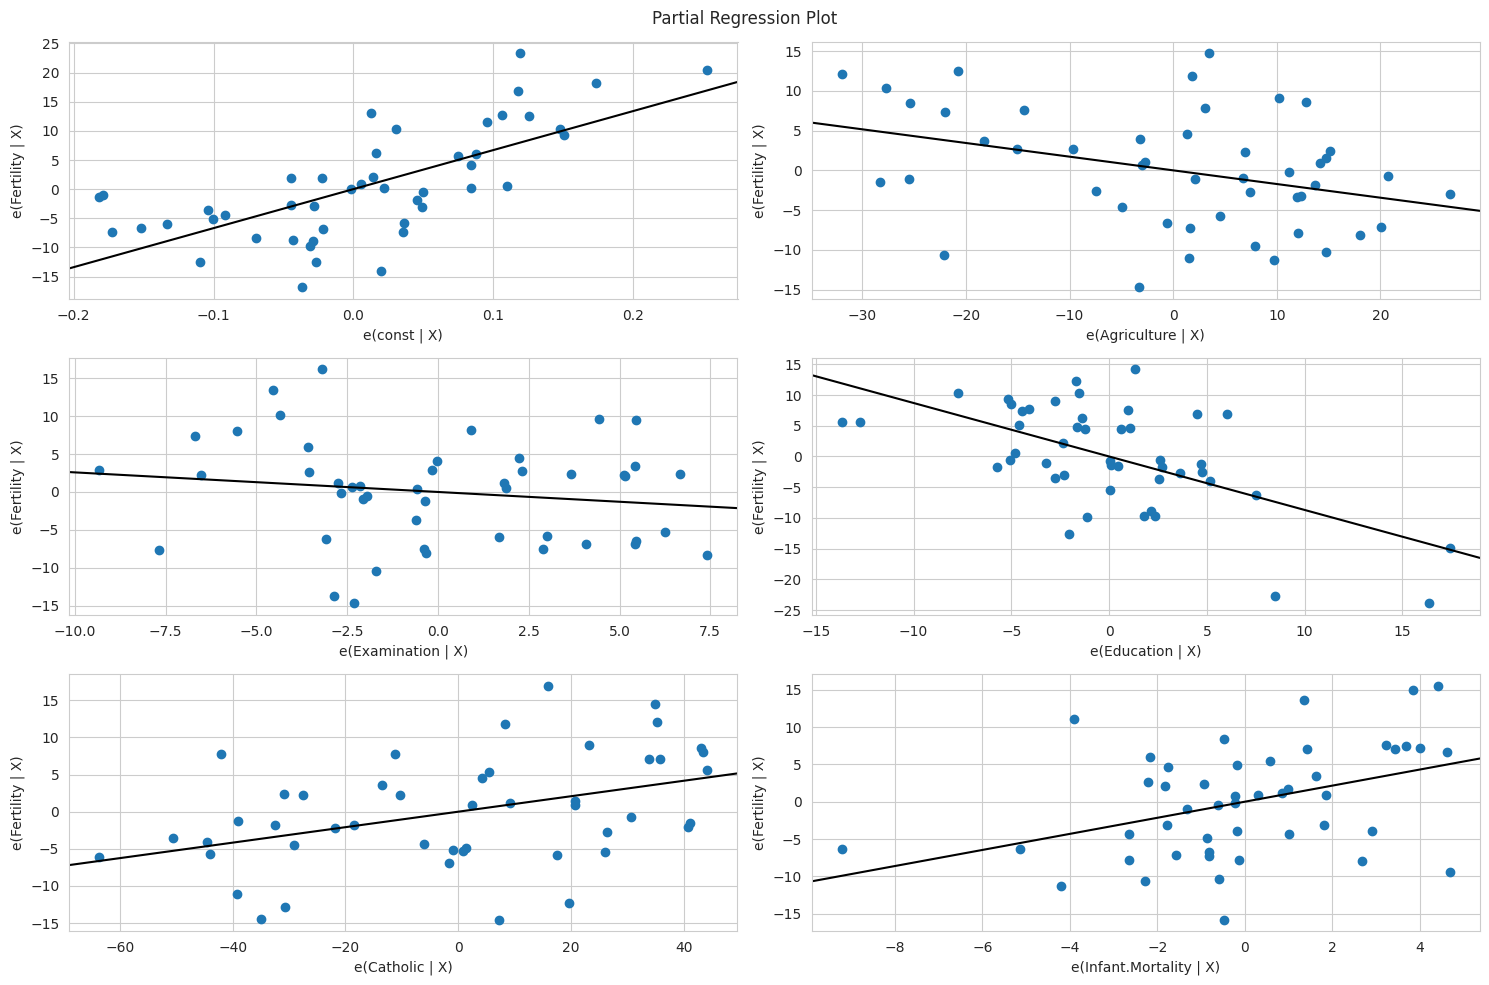


INTERPRETATION OF ADDED VARIABLE PLOTS:
Each plot shows the partial relationship between one predictor and fertility,
after removing the effects of all other variables.
- Steep slope: Strong relationship with fertility
- Flat slope: Weak relationship with fertility
- Points close to line: Good fit for that variable


In [13]:
# 10. Assess the added variables plots. Interpret these plots

from statsmodels.graphics.regressionplots import add_lowess
import warnings
warnings.filterwarnings('ignore')

print("ADDED VARIABLE PLOTS (Partial Regression Plots)")
print("=" * 50)
print("These show the relationship between each predictor and fertility,")
print("after controlling for all other variables in the model.")

fig = plt.figure(figsize=(15, 10))
fig = sm.graphics.plot_partregress_grid(model_multi, fig=fig)
plt.tight_layout()
plt.show()

print("\nINTERPRETATION OF ADDED VARIABLE PLOTS:")
print("Each plot shows the partial relationship between one predictor and fertility,")
print("after removing the effects of all other variables.")
print("- Steep slope: Strong relationship with fertility")
print("- Flat slope: Weak relationship with fertility") 
print("- Points close to line: Good fit for that variable")

11. Assess any influential data points by examining the Cooks distance plots.

INFLUENTIAL POINTS ANALYSIS - COOK'S DISTANCE


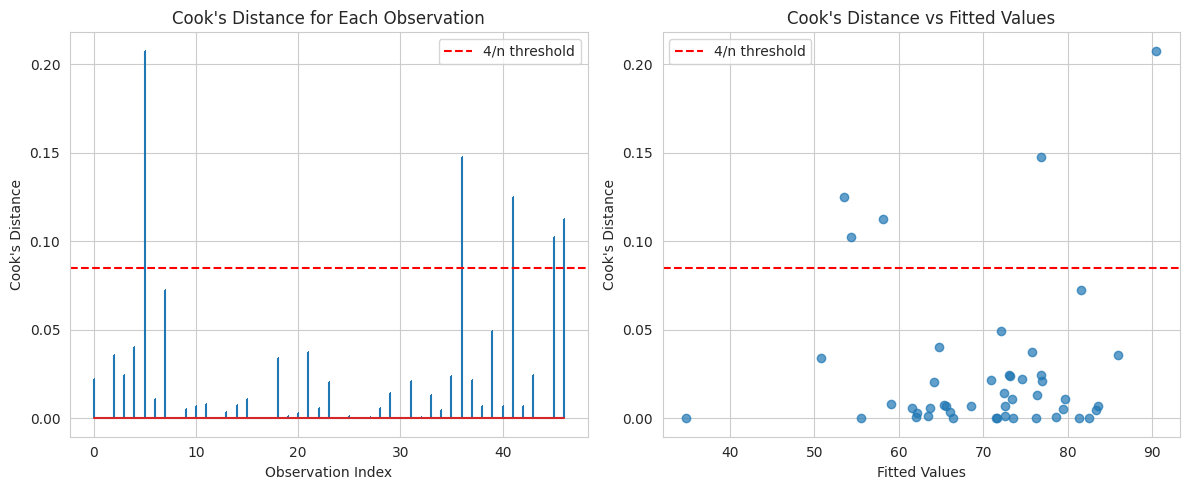


INFLUENTIAL POINTS ANALYSIS:
Threshold (4/n): 0.085
Number of influential points: 5
Influential observation indices: [ 5 36 41 45 46]

Influential provinces:
- Porrentruy (Index 5)
- Sierre (Index 36)
- Neuchatel (Index 41)
- Rive Droite (Index 45)
- Rive Gauche (Index 46)

RECOMMENDATION: Consider examining these provinces more closely.
They may have unusual characteristics affecting the model.

INTERPRETATION:
Cook's distance measures how much the regression coefficients change
when a particular observation is removed from the dataset.
Values above 4/n may be influential and warrant further investigation.


In [14]:
# 11. Assess any influential data points by examining the Cooks distance plots.

print("INFLUENTIAL POINTS ANALYSIS - COOK'S DISTANCE")
print("=" * 50)

# Calculate Cook's distance
influence = model_multi.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(cooks_d, markerfmt=",")
plt.axhline(y=4/len(swiss), color='red', linestyle='--', label='4/n threshold')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.legend()

# Identify influential points
influential_threshold = 4/len(swiss)
influential_points = np.where(cooks_d > influential_threshold)[0]

plt.subplot(1, 2, 2)
plt.scatter(fitted_multi, cooks_d, alpha=0.7)
plt.axhline(y=influential_threshold, color='red', linestyle='--', label='4/n threshold')
plt.xlabel('Fitted Values')
plt.ylabel("Cook's Distance")
plt.title('Cook\'s Distance vs Fitted Values')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nINFLUENTIAL POINTS ANALYSIS:")
print(f"Threshold (4/n): {influential_threshold:.3f}")
print(f"Number of influential points: {len(influential_points)}")

if len(influential_points) > 0:
    print(f"Influential observation indices: {influential_points}")
    print("\nInfluential provinces:")
    for idx in influential_points:
        print(f"- {swiss.iloc[idx]['Name']} (Index {idx})")
        
    print("\nRECOMMENDATION: Consider examining these provinces more closely.")
    print("They may have unusual characteristics affecting the model.")
else:
    print("No highly influential points detected (all Cook's distances < 4/n threshold)")

print("\nINTERPRETATION:")
print("Cook's distance measures how much the regression coefficients change")
print("when a particular observation is removed from the dataset.")
print("Values above 4/n may be influential and warrant further investigation.")